---
# 데이터 분석의 목표
 1. 매출 분석
 2. 고객 분석
  - 우수고객 선별
  - 고객 리텐션 분석
 3. push notification 실행 의사 결정 하기

#### 데이터 셋 
 - 온라인 리테일 사이트의 2010/12 - 2011/12간의 주문 기록 데이터
 - 약 500,000건의 데이터 
 - 데이터 출처: [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Online+Retail#)

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
basepath = r'D:\DevRoot\dataset'
filepath = os.path.join(basepath, 'OnlineRetail.csv')
retail = pd.read_csv(filepath)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# 컬럼 확인
retail.columns

# 'InvoiceNo' : 주문번호
# 'StockCode' : 상품코드(번호)
# 'Description' : 상품명
# 'Quantity' : 주문수량
# 'InvoiceDate' : 주문일자
# 'UnitPrice' : 단가
# 'CustomerID' : 주문고객
# 'Country' : 주문한 국가

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

#### 데이터 살펴보기
 1. 데이터 분석의 가장 첫 단계
 2. 데이터를 대략적으로 파악 가능(타입, 저장된 형태)
 3. 데이터 cleansing 전략 수립

In [4]:
retail.info()

# 결측치, dtype 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# 기술통계량
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data cleansing
 - null 데이터 처리
  - CustomerID 
 - Business 로직에 맞지 않은 데이터 처리
  - 음수의 아이템 수량
  - 가격이 0원 

In [6]:
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### CustomerID제거

In [7]:
retail = retail[pd.notnull(retail['CustomerID'])]
len(retail)

406829

#### 비지니스 로직에 맞지 않은 데이터 제거
 - 수량, 가격 > 0
 - Quantity, UnitPrice > 0 

In [8]:
retail = retail[retail['Quantity'] > 0]
retail = retail[retail['UnitPrice'] > 0]

len(retail)

397884

In [9]:
retail['CustomerID'] = retail['CustomerID'].astype(np.int64)

In [10]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  int64  
 7   Country      397884 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.3+ MB


In [11]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


#### 새로운 컬럼(파생변수) 추가 
 - Quantity * UnitPrice는 고객의 총 지출 비용(CheckoutPrice)

In [12]:
retail['CheckoutPrice'] = retail['Quantity'] * retail['UnitPrice']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


### 목표
1. 아이템별 지표 확인하기
2. 시간별 지역별 판매 지표 확인하기

## 날짜 타입 데이터 변환
 - 문자열로 로딩하는 것보다 date/datetime 타입으로 로딩하는 것이 분석에 용이

In [13]:
retail['InvoiceDate'] = pd.to_datetime(pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True))

retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397884 non-null  object        
 1   StockCode      397884 non-null  object        
 2   Description    397884 non-null  object        
 3   Quantity       397884 non-null  int64         
 4   InvoiceDate    397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float64       
 6   CustomerID     397884 non-null  int64         
 7   Country        397884 non-null  object        
 8   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.4+ MB


---
## 해당 기간 동안의 매출
 - 전체 매출
 - 국가별 매출
 - 월별 매출
 - 요일별 매출
 - 시간별 매출

In [14]:
# 전체매출
total_revenue = retail['CheckoutPrice'].sum()
total_revenue

8911407.904

In [15]:
# 국가별 매출
pd.options.display.float_format = '{:.2f}'.format

retail.groupby(['Country']).sum()

,Quantity,UnitPrice,CustomerID,CheckoutPrice
Country,,,,
Australia,83901,3612.50,14721267,138521.31
Austria,4881,1693.90,4982601,10198.68
Bahrain,260,78.95,210027,548.40
Belgium,23237,7372.85,25246701,41196.34
Brazil,356,142.60,408608,1143.60
Canada,2763,910.58,2615483,3666.38
Channel Islands,9491,3389.65,11138335,20450.44
Cyprus,6361,3506.18,7616904,13590.38
Czech Republic,671,78.27,319525,826.74


In [16]:
# 매출이 높은 국가순으로 정렬
rev_by_countries = retail.groupby(['Country']).sum()['CheckoutPrice'].sort_values(ascending=False)
rev_by_countries

Country
United Kingdom         7308391.55
Netherlands             285446.34
EIRE                    265545.90
Germany                 228867.14
France                  209024.05
Australia               138521.31
Spain                    61577.11
Switzerland              56443.95
Belgium                  41196.34
Sweden                   38378.33
Japan                    37416.37
Norway                   36165.44
Portugal                 33439.89
Finland                  22546.08
Singapore                21279.29
Channel Islands          20450.44
Denmark                  18955.34
Italy                    17483.24
Cyprus                   13590.38
Austria                  10198.68
Poland                    7334.65
Israel                    7221.69
Greece                    4760.52
Iceland                   4310.00
Canada                    3666.38
USA                       3580.39
Malta                     2725.59
Unspecified               2667.07
United Arab Emirates      1902.28
Lebano

[Text(0, 0, 'United Kingdom'),
 Text(1, 0, 'Netherlands'),
 Text(2, 0, 'EIRE'),
 Text(3, 0, 'Germany'),
 Text(4, 0, 'France'),
 Text(5, 0, 'Australia'),
 Text(6, 0, 'Spain'),
 Text(7, 0, 'Switzerland'),
 Text(8, 0, 'Belgium'),
 Text(9, 0, 'Sweden'),
 Text(10, 0, 'Japan'),
 Text(11, 0, 'Norway'),
 Text(12, 0, 'Portugal'),
 Text(13, 0, 'Finland'),
 Text(14, 0, 'Singapore'),
 Text(15, 0, 'Channel Islands'),
 Text(16, 0, 'Denmark'),
 Text(17, 0, 'Italy'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Austria'),
 Text(20, 0, 'Poland'),
 Text(21, 0, 'Israel'),
 Text(22, 0, 'Greece'),
 Text(23, 0, 'Iceland'),
 Text(24, 0, 'Canada'),
 Text(25, 0, 'USA'),
 Text(26, 0, 'Malta'),
 Text(27, 0, 'Unspecified'),
 Text(28, 0, 'United Arab Emirates'),
 Text(29, 0, 'Lebanon'),
 Text(30, 0, 'Lithuania'),
 Text(31, 0, 'European Community'),
 Text(32, 0, 'Brazil'),
 Text(33, 0, 'RSA'),
 Text(34, 0, 'Czech Republic'),
 Text(35, 0, 'Bahrain'),
 Text(36, 0, 'Saudi Arabia')]

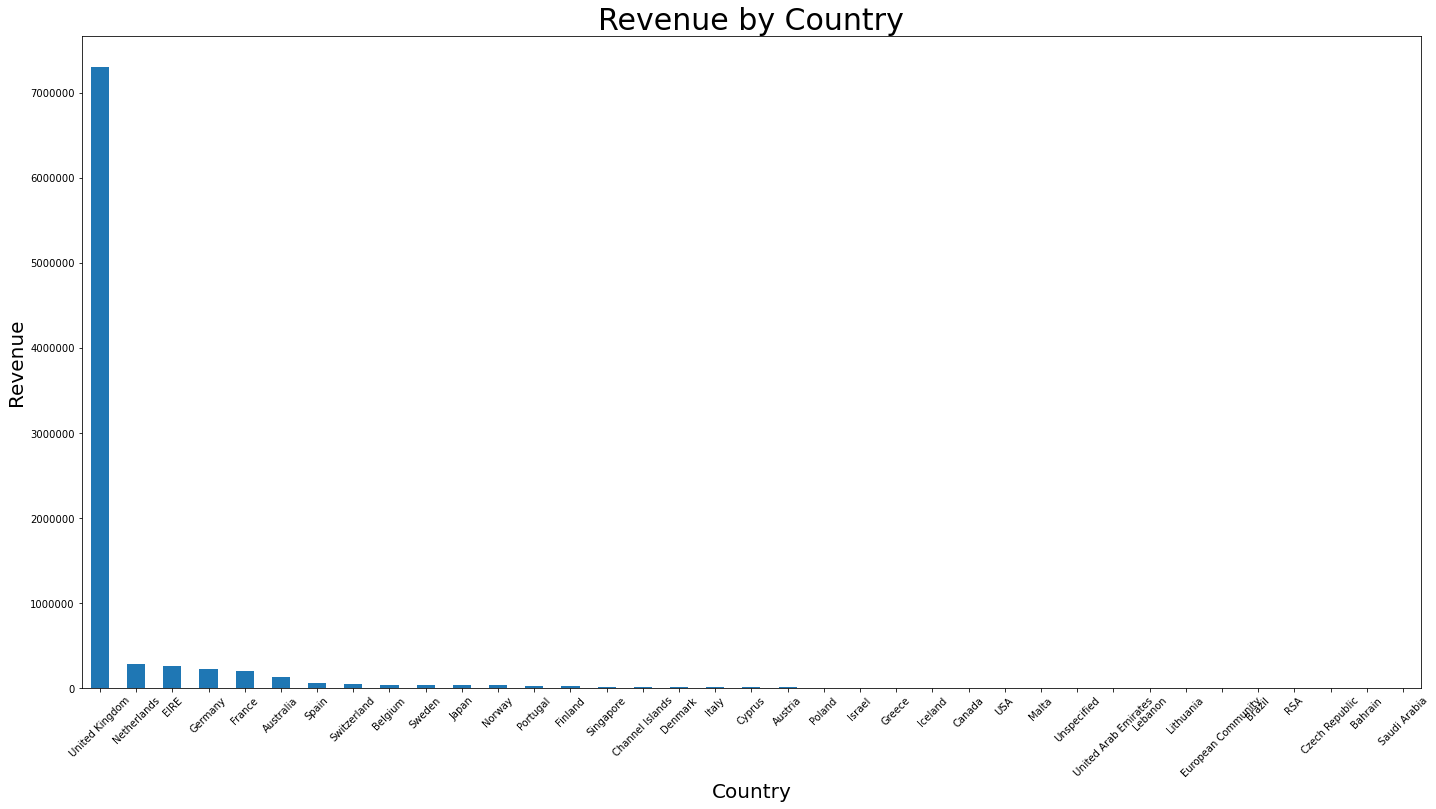

In [17]:
# 국가별 매출 시각화
plot = rev_by_countries.plot(kind='bar', figsize=(24,12))
plot.get_yaxis().get_major_formatter().set_scientific(False)
plot.set_xlabel('Country', fontsize=20)
plot.set_ylabel('Revenue', fontsize=20)
plot.set_title('Revenue by Country', fontsize=30)
plot.set_xticklabels(labels=rev_by_countries.index, rotation=45)

In [18]:
# 월별 매출
def get_month(date):
    month = str(date.month)
    if date.month < 10:
        month = '0' + month
    return str(date.year) + month

rev_by_month = retail.set_index('InvoiceDate').groupby(get_month).sum()['CheckoutPrice']
rev_by_month

201012    572713.89
201101    569445.04
201102    447137.35
201103    595500.76
201104    469200.36
201105    678594.56
201106    661213.69
201107    600091.01
201108    645343.90
201109    952838.38
201110   1039318.79
201111   1161817.38
201112    518192.79
Name: CheckoutPrice, dtype: float64

[Text(0, 0, '201012'),
 Text(1, 0, '201101'),
 Text(2, 0, '201102'),
 Text(3, 0, '201103'),
 Text(4, 0, '201104'),
 Text(5, 0, '201105'),
 Text(6, 0, '201106'),
 Text(7, 0, '201107'),
 Text(8, 0, '201108'),
 Text(9, 0, '201109'),
 Text(10, 0, '201110'),
 Text(11, 0, '201111'),
 Text(12, 0, '201112')]

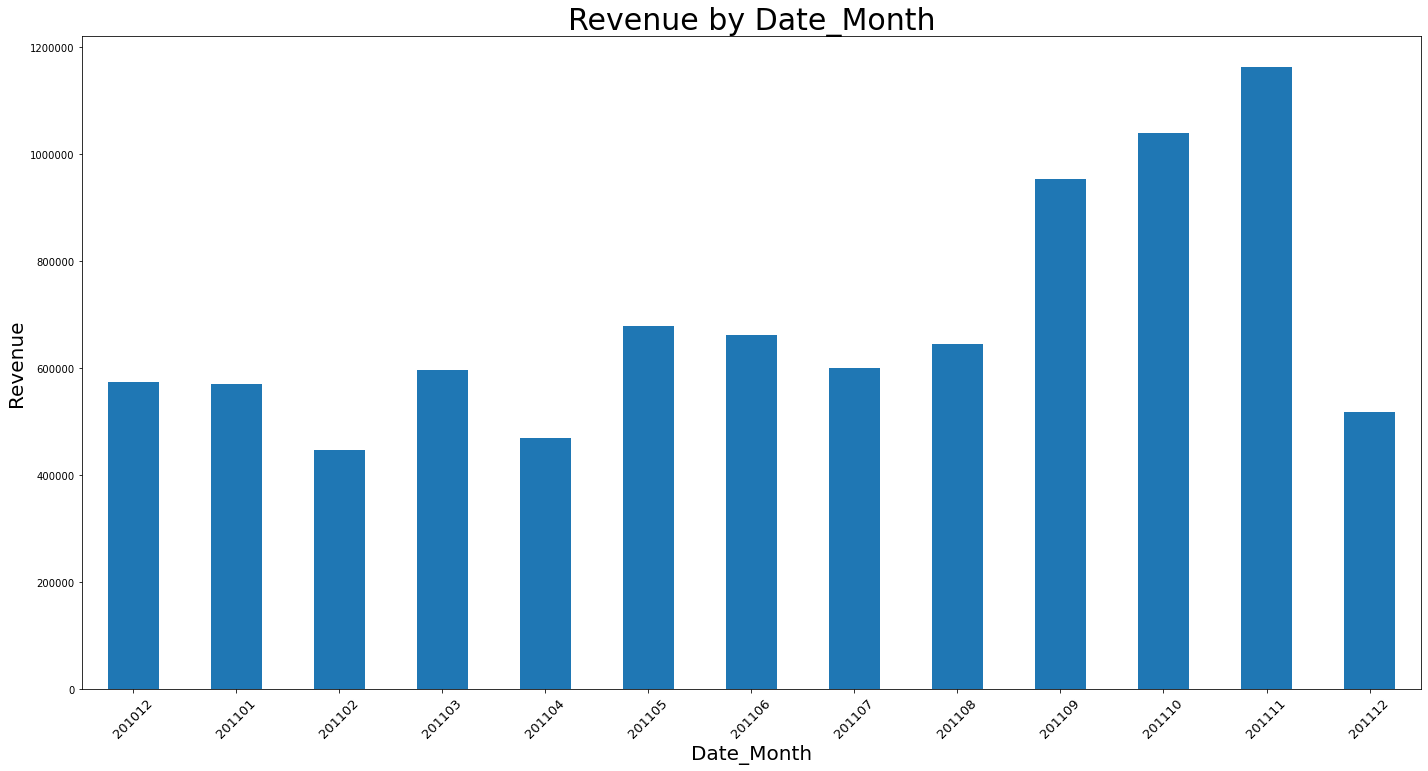

In [19]:
# 월별 매출 시각화
plot = rev_by_month.plot(kind='bar', figsize=(24,12))
plot.get_yaxis().get_major_formatter().set_scientific(False)
plot.set_xlabel('Date_Month', fontsize=20)
plot.set_ylabel('Revenue', fontsize=20)
plot.set_title('Revenue by Date_Month', fontsize=30)
plot.set_xticklabels(labels=rev_by_month.index, rotation=45, fontsize=13)

## 201112 데이터가 줄어든 이유
- 줄어든 이유는 아래와 같다. 2011년 12월 데이터가 전부있는게 아니라 9일까지만 가져왔기때문.

In [20]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [21]:
# 요일별 매출
rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date : date.dayofweek).sum()['CheckoutPrice']
rev_by_dow

0   1367146.41
1   1700634.63
2   1588336.17
3   1976859.07
4   1485917.40
6    792514.22
Name: CheckoutPrice, dtype: float64

### 5가 없는 이유는 토요일은 정기휴일

[Text(0, 0, 'Mon'),
 Text(1, 0, 'Tue'),
 Text(2, 0, 'Wed'),
 Text(3, 0, 'Thu'),
 Text(4, 0, 'Fri'),
 Text(5, 0, 'Sun')]

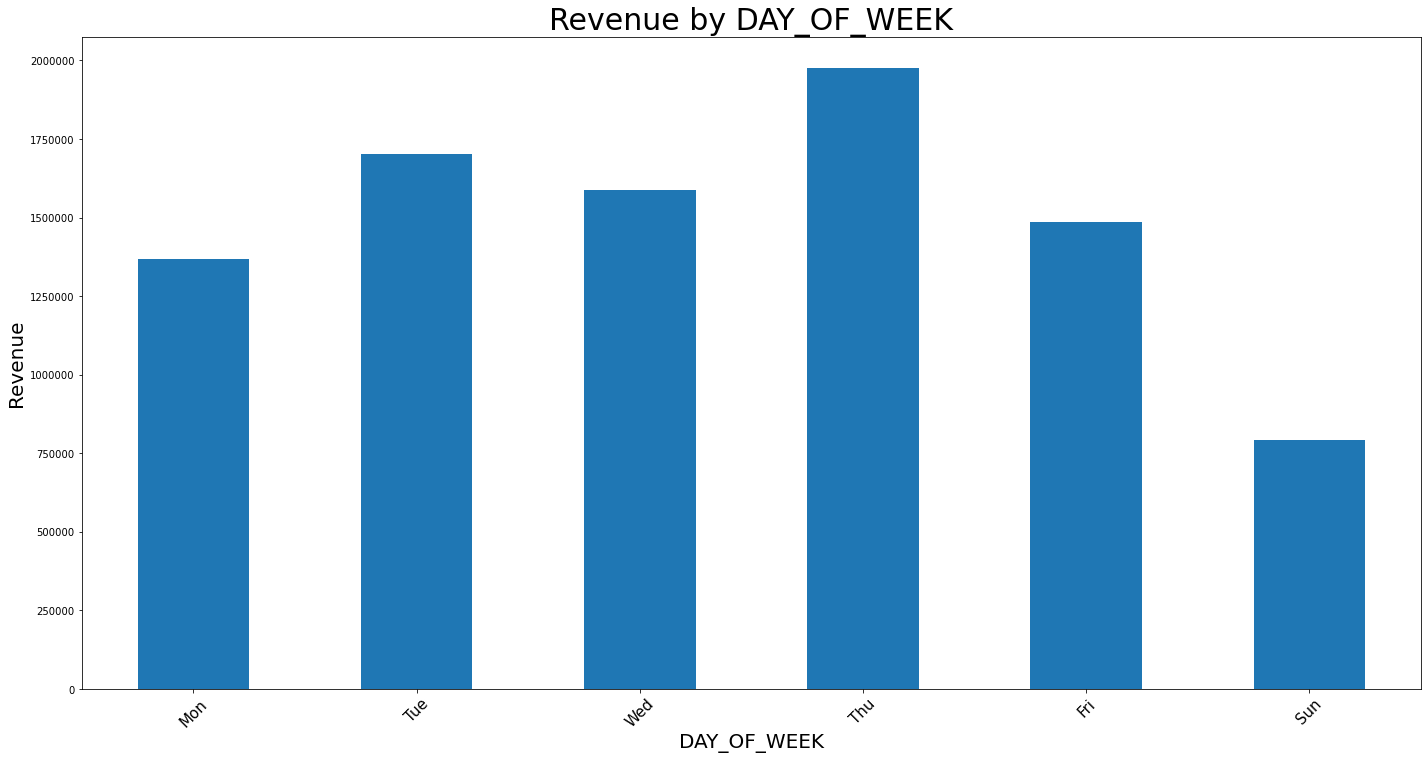

In [22]:
# 요일별 매출 시각화
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Wed', "Thu", 'Fri', 'Sun'])
plot = rev_by_dow.plot(kind='bar', figsize=(24,12))
plot.get_yaxis().get_major_formatter().set_scientific(False)
plot.set_xlabel('DAY_OF_WEEK', fontsize=20)
plot.set_ylabel('Revenue', fontsize=20)
plot.set_title('Revenue by DAY_OF_WEEK', fontsize=30)
plot.set_xticklabels(labels=DAY_OF_WEEK, rotation=45, fontsize=15)

In [23]:
# 시간대별 매출
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['CheckoutPrice']
rev_by_hour

6          4.25
7      31059.21
8     282115.63
9     842605.17
10   1261192.57
11   1104558.75
12   1378571.48
13   1173264.75
14    995629.37
15    966191.75
16    468885.80
17    234413.52
18    104954.43
19     49028.46
20     18932.76
Name: CheckoutPrice, dtype: float64

[Text(0, 0, '6'),
 Text(1, 0, '7'),
 Text(2, 0, '8'),
 Text(3, 0, '9'),
 Text(4, 0, '10'),
 Text(5, 0, '11'),
 Text(6, 0, '12'),
 Text(7, 0, '13'),
 Text(8, 0, '14'),
 Text(9, 0, '15'),
 Text(10, 0, '16'),
 Text(11, 0, '17'),
 Text(12, 0, '18'),
 Text(13, 0, '19'),
 Text(14, 0, '20')]

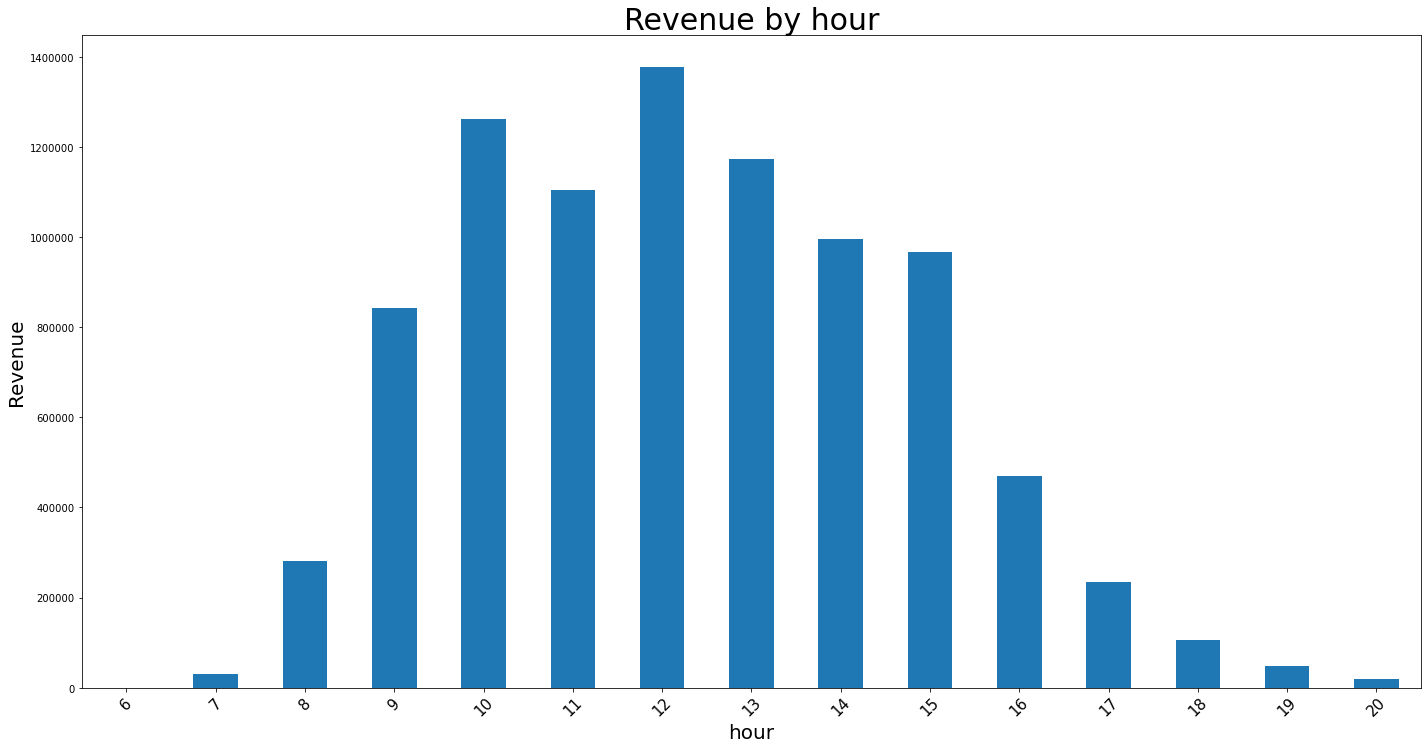

In [24]:
# 시간대별 매출 시각화
plot = rev_by_hour.plot(kind='bar', figsize=(24,12))
plot.get_yaxis().get_major_formatter().set_scientific(False)
plot.set_xlabel('hour', fontsize=20)
plot.set_ylabel('Revenue', fontsize=20)
plot.set_title('Revenue by hour', fontsize=30)
plot.set_xticklabels(labels=rev_by_hour.index, rotation=45, fontsize=15)

In [25]:
# 시간대별 주문건수
order_by_hour = retail.set_index('InvoiceDate').groupby(lambda date : date.hour).count()['CustomerID']
order_by_hour

6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
Name: CustomerID, dtype: int64

[Text(0, 0, '6'),
 Text(1, 0, '7'),
 Text(2, 0, '8'),
 Text(3, 0, '9'),
 Text(4, 0, '10'),
 Text(5, 0, '11'),
 Text(6, 0, '12'),
 Text(7, 0, '13'),
 Text(8, 0, '14'),
 Text(9, 0, '15'),
 Text(10, 0, '16'),
 Text(11, 0, '17'),
 Text(12, 0, '18'),
 Text(13, 0, '19'),
 Text(14, 0, '20')]

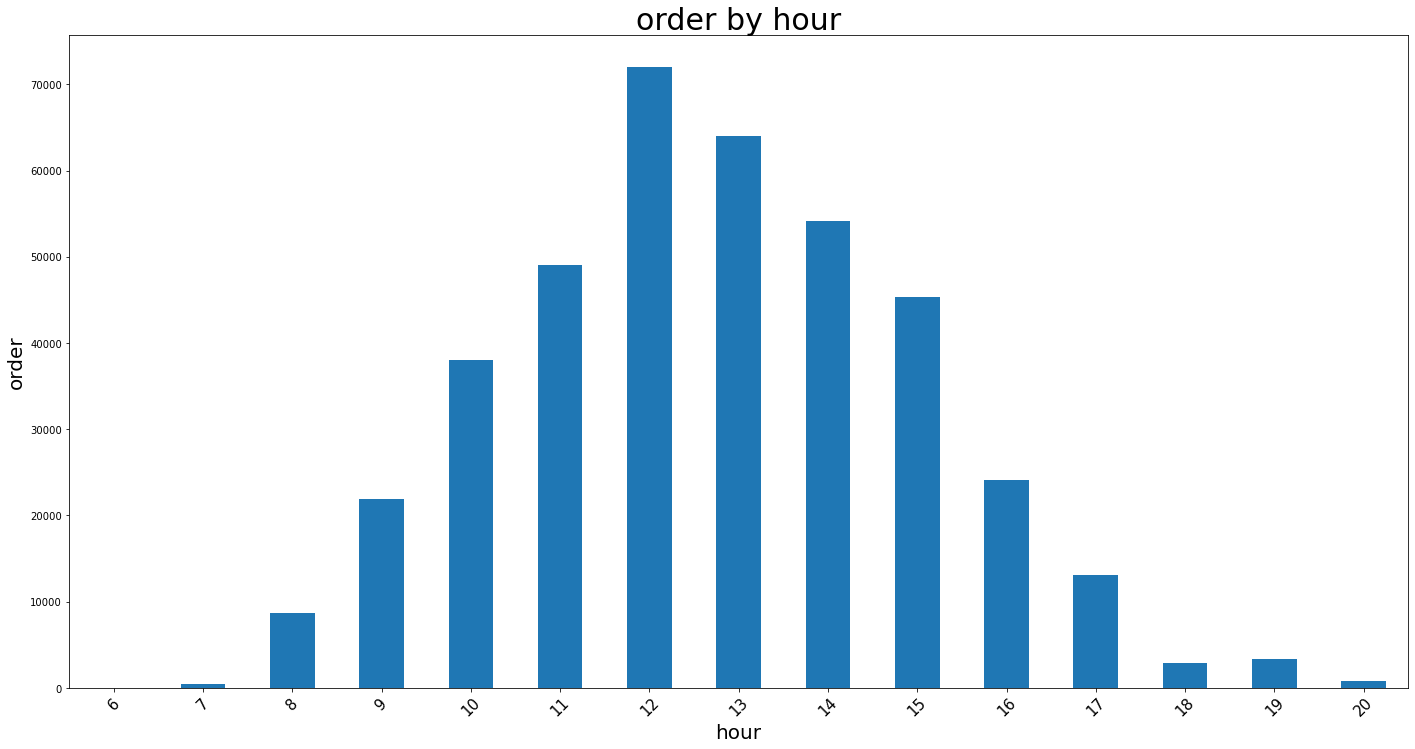

In [26]:
# 시간대별 주문건수 시각화
plot = order_by_hour.plot(kind='bar', figsize=(24,12))
plot.get_yaxis().get_major_formatter().set_scientific(False)
plot.set_xlabel('hour', fontsize=20)
plot.set_ylabel('order', fontsize=20)
plot.set_title('order by hour', fontsize=30)
plot.set_xticklabels(labels=order_by_hour.index, rotation=45, fontsize=15)

In [27]:
# 30분 단위로 보기
def half_an_hour(date):   
    minute = ':00'  # 모든 시간은 :00 분으로 초기화
    if date.minute > 30:
        minute = ':30'
    hour = str(date.hour)
    if date.hour < 10:
        hour = '0' + hour
    
    return hour + minute

order_by_hour_half = retail.set_index('InvoiceDate').groupby(half_an_hour).count()['CustomerID']
order_by_hour_half

06:00        1
07:30      379
08:00     3145
08:30     5545
09:00     9364
09:30    12580
10:00    16950
10:30    21047
11:00    18925
11:30    30159
12:00    37174
12:30    34891
13:00    31131
13:30    32895
14:00    26958
14:30    27160
15:00    24227
15:30    21142
16:00    14316
16:30     9773
17:00     8889
17:30     4182
18:00     1715
18:30     1213
19:00     1534
19:30     1787
20:00      802
Name: CustomerID, dtype: int64

[Text(0, 0, '06:00'),
 Text(1, 0, '07:30'),
 Text(2, 0, '08:00'),
 Text(3, 0, '08:30'),
 Text(4, 0, '09:00'),
 Text(5, 0, '09:30'),
 Text(6, 0, '10:00'),
 Text(7, 0, '10:30'),
 Text(8, 0, '11:00'),
 Text(9, 0, '11:30'),
 Text(10, 0, '12:00'),
 Text(11, 0, '12:30'),
 Text(12, 0, '13:00'),
 Text(13, 0, '13:30'),
 Text(14, 0, '14:00'),
 Text(15, 0, '14:30'),
 Text(16, 0, '15:00'),
 Text(17, 0, '15:30'),
 Text(18, 0, '16:00'),
 Text(19, 0, '16:30'),
 Text(20, 0, '17:00'),
 Text(21, 0, '17:30'),
 Text(22, 0, '18:00'),
 Text(23, 0, '18:30'),
 Text(24, 0, '19:00'),
 Text(25, 0, '19:30'),
 Text(26, 0, '20:00')]

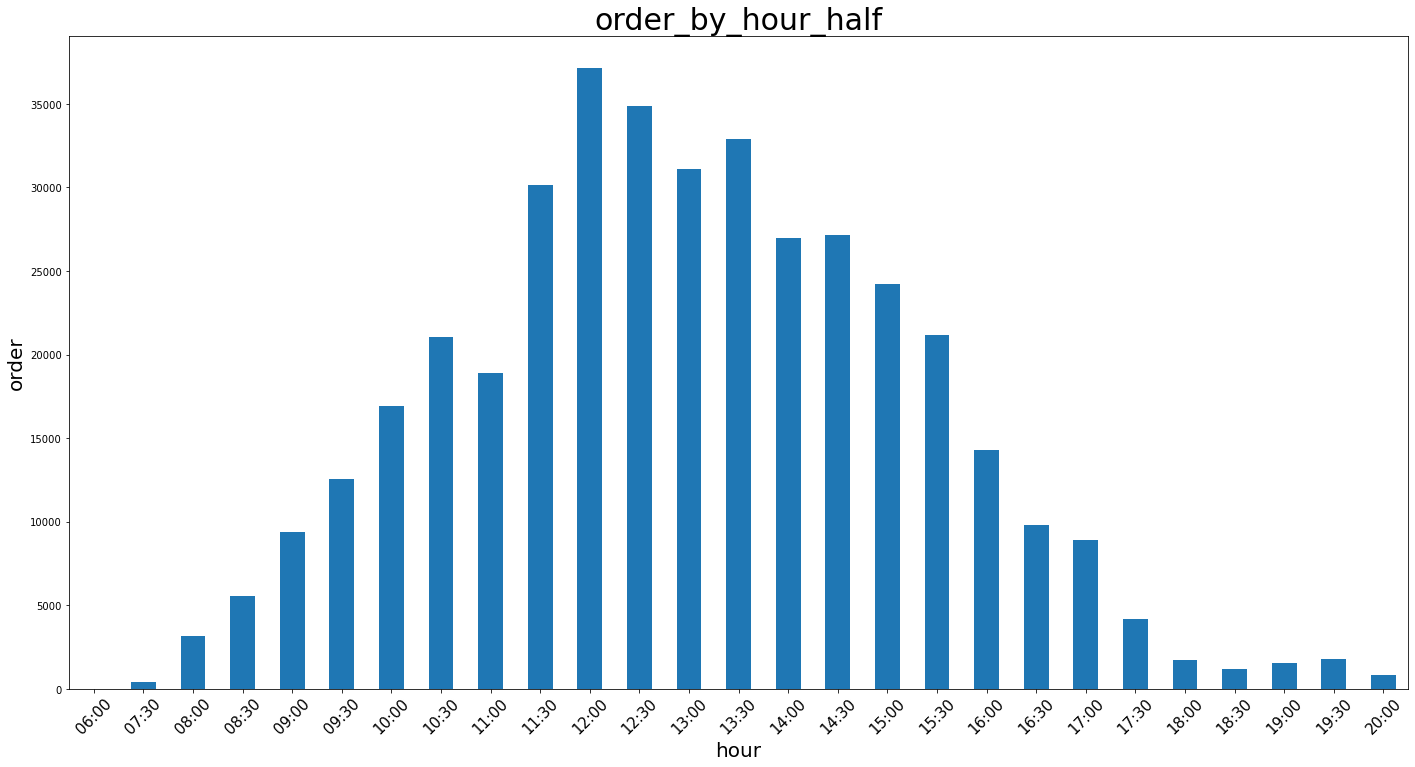

In [28]:
# 시간대별 주문건수 30단위 시각화
plot = order_by_hour_half.plot(kind='bar', figsize=(24,12))
plot.get_yaxis().get_major_formatter().set_scientific(False)
plot.set_xlabel('hour', fontsize=20)
plot.set_ylabel('order', fontsize=20)
plot.set_title('order_by_hour_half', fontsize=30)
plot.set_xticklabels(labels=order_by_hour_half.index, rotation=45, fontsize=15)

#### 매출 데이터로부터 insight 
 - 전체 매출의 82%가 UK에서 발생
 - 11년도의 가장 많은 주문이 발생한 달 11월(12월의 전체 데이터가 반영이 되진 않았음)
  - 10, 11, 12월의 판매량이 압도(블랙프라이데이, 사이버먼데이, 크리스마스 휴일)
 - 일주일중 목요일까지는 성장세를 보이다가, 이후로 하락(토요일에는 주문X)
 - 7시를 시작으로 주문이 시작되어 12시까지 증가세, 15시까지 하락을, 15시 이후 부터 급락)
    - 유추: 점심시간 자유를 통한 주문

# 데이터 기반으로 의사결정하기
언제 푸쉬 노티피케이션 해야 하나?

In [29]:
order_by_hour_half / order_by_hour_half.sum()

06:00   0.00
07:30   0.00
08:00   0.01
08:30   0.01
09:00   0.02
09:30   0.03
10:00   0.04
10:30   0.05
11:00   0.05
11:30   0.08
12:00   0.09
12:30   0.09
13:00   0.08
13:30   0.08
14:00   0.07
14:30   0.07
15:00   0.06
15:30   0.05
16:00   0.04
16:30   0.02
17:00   0.02
17:30   0.01
18:00   0.00
18:30   0.00
19:00   0.00
19:30   0.00
20:00   0.00
Name: CustomerID, dtype: float64

- 12:00 ~ 12:30 사이가 가장 많은 분포를 보이고 있지만 그 밖의 시간대의 비율이 훨씬 많습니다.
- 12:00, 12:30 은 9%, 8% 입니다. 총 17%입니다. 나머지 83% 를 버리는건 말도안됩니다.
- 그래서 필요한건 '개인화된 notification' 입니다.

In [30]:
# 고객ID별로 주문시간별 주문횟수
order_count_by_hour = retail.set_index('InvoiceDate').groupby(['CustomerID', lambda date: date.hour]).count()['Quantity']
order_count_by_hour 

CustomerID    
12346       10     1
12347       8     22
            10    24
            12    47
            13    18
                  ..
18283       15     1
            16    56
            19    87
18287       9      3
            10    67
Name: Quantity, Length: 11205, dtype: int64

In [33]:
# 고객ID별로 몇번 주문했는지
order_count_by_hour.groupby(['CustomerID']).size()
# 그 중 가장 많이 주문한 시간
idx = order_count_by_hour.groupby('CustomerID').idxmax()
idx

CustomerID
12346    (12346, 10)
12347    (12347, 14)
12348    (12348, 19)
12349     (12349, 9)
12350    (12350, 16)
            ...     
18280     (18280, 9)
18281    (18281, 10)
18282    (18282, 13)
18283    (18283, 14)
18287    (18287, 10)
Name: Quantity, Length: 4338, dtype: object

In [34]:
# 고객ID별 주문 많이 한 시간, 횟수
result = order_count_by_hour.loc[idx]
result
# 12349 손님은 9시에 73개를 주문했다.

CustomerID    
12346       10      1
12347       14     60
12348       19     17
12349       9      73
12350       16     17
                 ... 
18280       9      10
18281       10      7
18282       13      7
18283       14    201
18287       10     67
Name: Quantity, Length: 4338, dtype: int64

In [35]:
# 각 시간별 주문한 고객 수
result.reset_index().groupby('level_1').size()

level_1
7       8
8     125
9     333
10    510
11    477
12    756
13    672
14    566
15    478
16    231
17    122
18     30
19     24
20      6
dtype: int64

In [36]:
result.reset_index().groupby('level_1').groups

{7: [73, 269, 319, 344, 375, 893, 1667, 2317], 8: [46, 58, 87, 126, 172, 179, 187, 260, 278, 279, 282, 292, 306, 347, 399, 429, 496, 503, 526, 533, 549, 552, 651, 671, 747, 755, 784, 792, 800, 803, 806, 821, 838, 877, 883, 920, 944, 947, 951, 954, 1008, 1093, 1106, 1120, 1138, 1172, 1173, 1217, 1251, 1397, 1422, 1424, 1436, 1472, 1512, 1616, 1621, 1666, 1668, 1678, 1687, 1734, 1759, 1761, 1774, 1791, 1815, 1827, 1846, 1859, 1895, 1900, 1903, 1996, 2018, 2023, 2054, 2085, 2108, 2117, 2167, 2172, 2253, 2380, 2383, 2403, 2404, 2417, 2427, 2462, 2464, 2643, 2749, 2776, 2781, 2896, 2936, 2949, 3021, 3130, ...], 9: [3, 9, 26, 30, 33, 35, 37, 48, 60, 66, 75, 84, 86, 90, 100, 106, 107, 121, 127, 135, 138, 142, 144, 146, 154, 159, 181, 199, 230, 240, 264, 265, 267, 277, 280, 286, 294, 298, 328, 333, 336, 342, 343, 352, 362, 366, 385, 402, 421, 459, 470, 475, 478, 482, 483, 509, 517, 519, 574, 603, 615, 630, 636, 642, 644, 691, 701, 706, 707, 746, 749, 752, 764, 770, 781, 783, 818, 825, 829, 844

- 시갇대별로 어떤 사용자가 가장 많은 구매를 주문했는지 확인 가능합니다.
- 이를 토대로 해당 시간대에 해당 사용자에게 보내면 됩니다.
- 예) 7: [73, 269, 319, 344, 375, 893, 1667, 2317] <- 7시에는 이 사용자들에게 notification 을 보내면 됩니다.

---
# 제품
- Top10 판매제품
- Top10 매출제품

In [37]:
# 판매량 높은 제품 Top10
top_selling = retail.groupby(['StockCode']).size().sort_values(ascending=False)[:10]
top_selling

StockCode
85123A    2035
22423     1723
85099B    1618
84879     1408
47566     1396
20725     1317
22720     1159
20727     1105
POST      1099
23203     1098
dtype: int64

In [38]:
# 매출이 높은 제품 Top10
top_revenue = retail.groupby(['StockCode']).sum()['CheckoutPrice'].sort_values(ascending=False)[:10]
top_revenue

StockCode
23843    168469.60
22423    142592.95
85123A   100603.50
85099B    85220.78
23166     81416.73
POST      77803.96
47566     68844.33
84879     56580.34
M         53779.93
23084     51346.20
Name: CheckoutPrice, dtype: float64

In [39]:
# 판매량 높은 제품 Top3 월별 판매량 및 판매금액
monthly_selling_top3 = retail.set_index('InvoiceDate').groupby(['StockCode', get_month]).sum()\
.loc[top_selling[:3].index][['Quantity','CheckoutPrice']]
monthly_selling_top3

Quantity  CheckoutPrice
StockCode                                
85123A    201012      3611        9602.05
          201101      5467       14979.75
          201102      1823        4912.65
          201103      1918        5262.50
          201104      3725        9581.65
          201105      3846       10700.42
          201106      1618        4401.90
          201107      2971        8303.97
          201108      2046        5498.10
          201109      2444        6789.00
          201110      1650        4564.54
          201111      4861       13855.83
          201112       802        2151.14
22423     201012      1570       17756.70
          201101       946       10765.50
          201102       839        9559.65
          201103      1296       14797.40
          201104      1098       12721.50
          201105       996       11503.60
          201106       712        8229.10
          201107      1076       12225.00
          201108       775        8934.45
          201109       730        8570.13
          201110      1028       11920.65
          201111       944       11064.24
          201112       392        4545.03
85099B    201012      2056        3619.20
          201101      2625        4542.75
          201102      2971        5191.05
          201103      4924        8496.88
          201104      2211        4141.78
          201105      3470        6585.20
          201106      3529        6628.42
          201107      2970        5654.60
          201108      5278        9871.44
          201109      4177        7992.01
          201110      5237        9763.06
          201111      5678       10713.99
          201112      1055        2020.40

In [40]:
# 매출이 높은 제품 Top3 월별 판매량 및 판매금액
monthly_revenue_top3 = retail.set_index('InvoiceDate').groupby(['StockCode', get_month]).sum()\
.loc[top_revenue[:3].index][['Quantity','CheckoutPrice']]
monthly_revenue_top3

Quantity  CheckoutPrice
StockCode                                
23843     201112     80995      168469.60
22423     201012      1570       17756.70
          201101       946       10765.50
          201102       839        9559.65
          201103      1296       14797.40
          201104      1098       12721.50
          201105       996       11503.60
          201106       712        8229.10
          201107      1076       12225.00
          201108       775        8934.45
          201109       730        8570.13
          201110      1028       11920.65
          201111       944       11064.24
          201112       392        4545.03
85123A    201012      3611        9602.05
          201101      5467       14979.75
          201102      1823        4912.65
          201103      1918        5262.50
          201104      3725        9581.65
          201105      3846       10700.42
          201106      1618        4401.90
          201107      2971        8303.97
          201108      2046        5498.10
          201109      2444        6789.00
          201110      1650        4564.54
          201111      4861       13855.83
          201112       802        2151.14

# 목표
1. 소비 우수고객 찾기
2. 고객 retention(재구매율)

## 우수고객확인
- 구매 수량 기준
- 지불 금액 기준

In [41]:
# 구매수량 기준
retail.groupby(['CustomerID']).count()['Quantity'].sort_values(ascending=False)

CustomerID
17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
         ... 
17846       1
13017       1
13099       1
13106       1
12346       1
Name: Quantity, Length: 4338, dtype: int64

In [42]:
# 지불금액 기준
retail.groupby(['CustomerID']).sum()['CheckoutPrice'].sort_values(ascending=False)

CustomerID
14646   280206.02
18102   259657.30
17450   194550.79
16446   168472.50
14911   143825.06
           ...   
16878       13.30
17956       12.75
16454        6.90
14792        6.20
16738        3.75
Name: CheckoutPrice, Length: 4338, dtype: float64

# 사용자 retention 분석
 - 월간 사용자 cohort를 바탕으로 월별 재구매율(retention) 분석하기
 - heatmap으로 한눈에 재구매율을 파악 가능
   -![코호트 분석](https://analyticsmarketing.co.kr/wp-content/uploads/2017/08/%EA%B5%AC%EA%B8%80%EC%95%A0%EB%84%90%EB%A6%AC%ED%8B%B1%EC%8A%A4_%EC%BD%94%ED%98%B8%ED%8A%B8_01.png) 출처: https://analyticsmarketing.co.kr/digital-analytics/google-analytics/1527/

In [43]:
# 구매한 월
def get_month_as_datetime(date):
    return datetime(date.year, date.month, 1) 
retail['Month'] = retail['InvoiceDate'].apply(get_month_as_datetime)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [44]:
# 최초 구매한 월
retail['MonthStarted'] = retail.groupby(['CustomerID'])['Month'].transform(np.min)
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01


In [45]:
# 구매월 - 첫 구매월
retail['MonthPassed'] = (retail['Month'].dt.year - retail['MonthStarted'].dt.year) * 12 + \
    (retail['Month'].dt.month - retail['MonthStarted'].dt.month)
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted,MonthPassed
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010-12-01,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4


#### 기준 월, MonthPassed를 기준으로 고객 카운팅
 - 기준이 되는 월과 그 월로부터 지난 기간(MonthPassed)의 고객 수를 계산

In [47]:
cohort_group = retail.groupby(['MonthStarted', 'MonthPassed'])
def get_unique_no(x):   # x 는 각 그룹별 CustomerID 들이 담겨있다
    return len(np.unique(x))
cohort_group['CustomerID'].apply(get_unique_no)

MonthStarted  MonthPassed
2010-12-01    0              885
              1              324
              2              286
              3              340
              4              321
                            ... 
2011-10-01    1               86
              2               41
2011-11-01    0              323
              1               36
2011-12-01    0               41
Name: CustomerID, Length: 91, dtype: int64

### 2010-12-01 에 구매한 고객수 885
- 그 고객들 중 1개월이 지나서 재구매한 고객의 수는 324명
- 그 고객들 중 2개월이 지나서 재구매한 고객의 수는 286명
- ...

In [48]:
cohort_df = cohort_group['CustomerID'].apply(get_unique_no).reset_index()
cohort_df = cohort_df.pivot(index='MonthStarted', columns='MonthPassed')
cohort_df

CustomerID                                                   \
MonthPassed          0      1      2      3      4      5      6      7    
MonthStarted                                                               
2010-12-01       885.00 324.00 286.00 340.00 321.00 352.00 321.00 309.00   
2011-01-01       417.00  92.00 111.00  96.00 134.00 120.00 103.00 101.00   
2011-02-01       380.00  71.00  71.00 108.00 103.00  94.00  96.00 106.00   
2011-03-01       452.00  68.00 114.00  90.00 101.00  76.00 121.00 104.00   
2011-04-01       300.00  64.00  61.00  63.00  59.00  68.00  65.00  78.00   
2011-05-01       284.00  54.00  49.00  49.00  59.00  66.00  75.00  27.00   
2011-06-01       242.00  42.00  38.00  64.00  56.00  81.00  23.00    NaN   
2011-07-01       188.00  34.00  39.00  42.00  51.00  21.00    NaN    NaN   
2011-08-01       169.00  35.00  42.00  41.00  21.00    NaN    NaN    NaN   
2011-09-01       299.00  70.00  90.00  34.00    NaN    NaN    NaN    NaN   
2011-10-01       358.00  86.00  41.00    NaN    NaN    NaN    NaN    NaN   
2011-11-01       323.00  36.00    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01        41.00    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                 
MonthPassed      8      9      10     11     12  
MonthStarted                                     
2010-12-01   313.00 350.00 331.00 445.00 235.00  
2011-01-01   125.00 136.00 152.00  49.00    NaN  
2011-02-01    94.00 116.00  26.00    NaN    NaN  
2011-03-01   126.00  39.00    NaN    NaN    NaN  
2011-04-01    22.00    NaN    NaN    NaN    NaN  
2011-05-01      NaN    NaN    NaN    NaN    NaN  
2011-06-01      NaN    NaN    NaN    NaN    NaN  
2011-07-01      NaN    NaN    NaN    NaN    NaN  
2011-08-01      NaN    NaN    NaN    NaN    NaN  
2011-09-01      NaN    NaN    NaN    NaN    NaN  
2011-10-01      NaN    NaN    NaN    NaN    NaN  
2011-11-01      NaN    NaN    NaN    NaN    NaN  
2011-12-01      NaN    NaN    NaN    NaN    NaN

In [49]:
# 위와같이 월간 사용자 cohort를 바탕으로 월별 재구매율(retention) 분석하기
customer_cohort = cohort_df.div(cohort_df.iloc[:,0], axis=0) * 100
customer_cohort

CustomerID                                                        \
MonthPassed          0     1     2     3     4     5     6     7     8     9    
MonthStarted                                                                    
2010-12-01       100.00 36.61 32.32 38.42 36.27 39.77 36.27 34.92 35.37 39.55   
2011-01-01       100.00 22.06 26.62 23.02 32.13 28.78 24.70 24.22 29.98 32.61   
2011-02-01       100.00 18.68 18.68 28.42 27.11 24.74 25.26 27.89 24.74 30.53   
2011-03-01       100.00 15.04 25.22 19.91 22.35 16.81 26.77 23.01 27.88  8.63   
2011-04-01       100.00 21.33 20.33 21.00 19.67 22.67 21.67 26.00  7.33   NaN   
2011-05-01       100.00 19.01 17.25 17.25 20.77 23.24 26.41  9.51   NaN   NaN   
2011-06-01       100.00 17.36 15.70 26.45 23.14 33.47  9.50   NaN   NaN   NaN   
2011-07-01       100.00 18.09 20.74 22.34 27.13 11.17   NaN   NaN   NaN   NaN   
2011-08-01       100.00 20.71 24.85 24.26 12.43   NaN   NaN   NaN   NaN   NaN   
2011-09-01       100.00 23.41 30.10 11.37   NaN   NaN   NaN   NaN   NaN   NaN   
2011-10-01       100.00 24.02 11.45   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-11-01       100.00 11.15   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-12-01       100.00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                                
MonthPassed     10    11    12  
MonthStarted                    
2010-12-01   37.40 50.28 26.55  
2011-01-01   36.45 11.75   NaN  
2011-02-01    6.84   NaN   NaN  
2011-03-01     NaN   NaN   NaN  
2011-04-01     NaN   NaN   NaN  
2011-05-01     NaN   NaN   NaN  
2011-06-01     NaN   NaN   NaN  
2011-07-01     NaN   NaN   NaN  
2011-08-01     NaN   NaN   NaN  
2011-09-01     NaN   NaN   NaN  
2011-10-01     NaN   NaN   NaN  
2011-11-01     NaN   NaN   NaN  
2011-12-01     NaN   NaN   NaN

<AxesSubplot:xlabel='None-MonthPassed', ylabel='MonthStarted'>

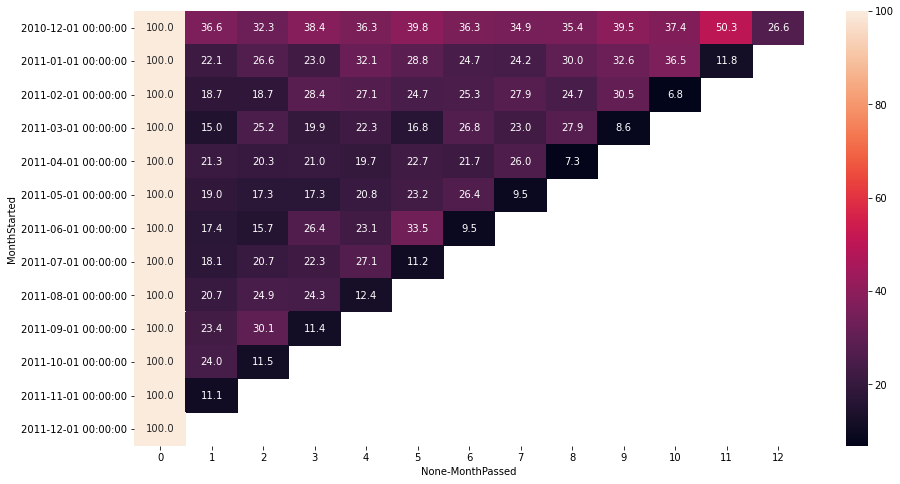

In [50]:
xticks = np.arange(0, 13)
yticks = customer_cohort.index
plt.figure(figsize=(15, 8))

sns.heatmap(customer_cohort,
            annot=True,  # 값 표시
            fmt = '.1f',  # 소숫점 1자리
            xticklabels = xticks,
            yticklabels = yticks
           )